In [1]:
import math
import tensorflow as tf
from random import random, choice
import numpy
import numpy as np
import numpy.matlib
from matplotlib import cm


import matplotlib
import matplotlib.pyplot as plt
%matplotlib notebook  

from mpl_toolkits.mplot3d import Axes3D

In [2]:
def foo(x,y):
    return x*y + math.sin(3 * y)

In [146]:
def makeTraining(n = 1000):

    trainingData = []
    trainingLabels = []
    

    for i in range(n):
        
        x = random() * choice([2, -2])
        y = random() * choice([2, -2])
            
        trainingData.append([x,y])
        trainingLabels.append([foo(x,y)])
                

    return trainingData, trainingLabels

In [147]:
x = tf.placeholder(tf.float32, [None, 2]) #input 28x28 array of pixels

# trying to learn W and b
W1 = tf.Variable(tf.random_uniform([2, 3])) # "weights" 10 linear combos of the input -> 10 different numbers given an input
offset1 = tf.Variable(tf.random_uniform([3])) # offset for the "weights"
W2 = tf.Variable(tf.random_uniform([3, 1])) # "weights" 10 linear combos of the input -> 10 different numbers given an input

a0 = tf.nn.relu(tf.add(tf.matmul(x, W1), offset1))
a1 = tf.nn.relu(tf.matmul(a0, W2)) # the output

y = a1

# Define loss and optimizer
y_ = tf.placeholder(tf.float32, [None, 1]) #true output


# The raw formulation of cross-entropy,
#
#   tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(tf.nn.softmax(y)),
#                                 reduction_indices=[1]))
#
# can be numerically unstable.
#
# So here we use tf.nn.softmax_cross_entropy_with_logits on the raw
# outputs of 'y', and then average across the batch.
cross_entropy = tf.reduce_mean(tf.abs(tf.subtract(y, y_)))
train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)

sess = tf.InteractiveSession()

tf.global_variables_initializer().run()


# Train

for i in range(1000):
    batch_xs, batch_ys = makeTraining()
    sess.run(train_step, feed_dict={x: batch_xs, y_: batch_ys})

In [148]:
# Get network from tensorflow

m1 = numpy.transpose(W1.eval())
b = numpy.transpose(offset1.eval())
m2 = numpy.transpose(W2.eval())

In [10]:
# create inputs
grid = 15

x = numpy.linspace(-2, 2, grid)
y = numpy.linspace(-2, 2, grid)
grid_size = x[1]-x[0]
circle_mesh_x, circle_mesh_y = numpy.meshgrid(x, y)
Z = np.zeros((grid,grid))
for i in range(grid):
    for j in range(grid):
        Z[i,j] = (circle_mesh_x[i,j]+0.5*grid_size)**2 + (circle_mesh_y+0.5*grid_size)[i,j]**2

N = Z/Z.max() # for colors

mesh = [circle_mesh_x.reshape(grid**2), circle_mesh_y.reshape(grid**2)]


array([[ 0.75111111,  0.64444444,  0.55555556,  0.48444444,  0.43111111,
         0.39555556,  0.37777778,  0.37777778,  0.39555556,  0.43111111,
         0.48444444,  0.55555556,  0.64444444,  0.75111111,  0.87555556],
       [ 0.64444444,  0.53777778,  0.44888889,  0.37777778,  0.32444444,
         0.28888889,  0.27111111,  0.27111111,  0.28888889,  0.32444444,
         0.37777778,  0.44888889,  0.53777778,  0.64444444,  0.76888889],
       [ 0.55555556,  0.44888889,  0.36      ,  0.28888889,  0.23555556,
         0.2       ,  0.18222222,  0.18222222,  0.2       ,  0.23555556,
         0.28888889,  0.36      ,  0.44888889,  0.55555556,  0.68      ],
       [ 0.48444444,  0.37777778,  0.28888889,  0.21777778,  0.16444444,
         0.12888889,  0.11111111,  0.11111111,  0.12888889,  0.16444444,
         0.21777778,  0.28888889,  0.37777778,  0.48444444,  0.60888889],
       [ 0.43111111,  0.32444444,  0.23555556,  0.16444444,  0.11111111,
         0.07555556,  0.05777778,  0.05777778, 

In [150]:
# run the inputs through the first layer

output_mesh = [mesh[0], mesh[1], np.zeros((grid,grid))]
#output_mesh = tf.nn.relu(numpy.matmul(m1,mesh) + numpy.transpose(numpy.matlib.repmat(b, 100, 1))).eval() # first layer


# Input Layer

<IPython.core.display.Javascript object>


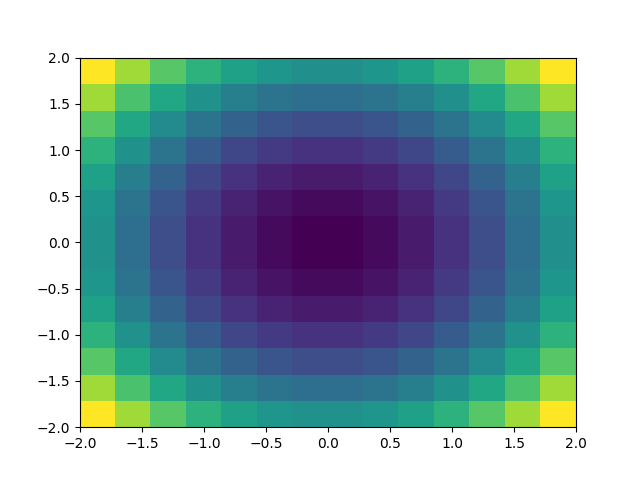

In [11]:
# initialize plot

%matplotlib notebook
fig = plt.figure()

In [12]:
# run plot
plt.pcolor(circle_mesh_x, circle_mesh_y, N, edgecolors='none')
plt.show()

# Layer 1

In [153]:
# run the inputs through the first layer
# output_mesh = tf.nn.relu(numpy.matmul(m1,mesh) + numpy.transpose(numpy.matlib.repmat(b, 100, 1))).eval() # first layer

output_mesh0 = output_mesh
output_mesh1 = numpy.matmul(m1,mesh)
output_mesh2 = output_mesh1 + numpy.transpose(numpy.matlib.repmat(b, grid**2, 1))
output_mesh3 = tf.nn.relu(output_mesh2).eval()



<IPython.core.display.Javascript object>


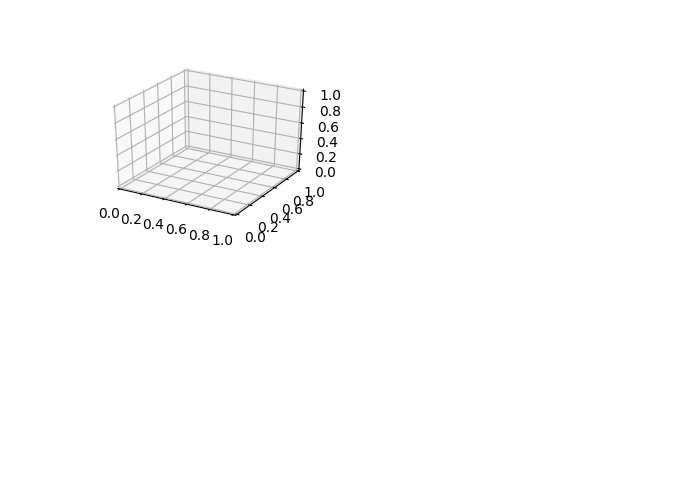

In [7]:
# initialize plot

%matplotlib notebook
fig2 = plt.figure(figsize=plt.figaspect(0.7))


In [8]:
# run plot
ax = fig2.add_subplot(221, projection='3d')
surf = ax.plot_surface(output_mesh0[0].reshape(grid,grid),output_mesh0[1].reshape(grid,grid), output_mesh0[2].reshape(grid,grid), rstride=1, cstride=1,facecolors=cm.jet(N),linewidth=0, antialiased=False, shade=False)


ax1 = fig2.add_subplot(222, sharex=ax, sharey=ax,sharez=ax, projection='3d')
surf = ax1.plot_surface(output_mesh1[0].reshape(grid,grid),output_mesh1[1].reshape(grid,grid), output_mesh1[2].reshape(grid,grid), rstride=1, cstride=1,facecolors=cm.jet(N),linewidth=0, antialiased=False, shade=False)

ax2 = fig2.add_subplot(223, sharex=ax, sharey=ax,sharez=ax, projection='3d')
surf = ax2.plot_surface(output_mesh2[0].reshape(grid,grid),output_mesh2[1].reshape(grid,grid), output_mesh2[2].reshape(grid,grid), rstride=1, cstride=1,facecolors=cm.jet(N),linewidth=0, antialiased=False, shade=False)

ax3 = fig2.add_subplot(224, sharex=ax, sharey=ax,sharez=ax, projection='3d')
surf = ax3.plot_surface(output_mesh3[0].reshape(grid,grid),output_mesh3[1].reshape(grid,grid), output_mesh3[2].reshape(grid,grid), rstride=1, cstride=1,facecolors=cm.jet(N),linewidth=0, antialiased=False, shade=False)

ax_limits = 2
ax.set_xlim([-ax_limits,ax_limits])
ax.set_ylim([-ax_limits,ax_limits])
ax.set_zlim([-ax_limits,ax_limits])

plt.show()

NameError: name 'output_mesh0' is not defined

# Output Layer

In [156]:
output_mesh4 = numpy.matmul(m2,output_mesh3)
#output_mesh5 = [tf.nn.softmax([output_mesh4[0][i],output_mesh4[1][i]]).eval()[0] for i in range(grid**2)]
#output_mesh5 = [[np.exp(output_mesh4[0][i])/(np.exp(output_mesh4[0][i]) + np.exp(output_mesh4[1][i])) for i in range(grid**2)], [np.exp(output_mesh4[1][i])/(np.exp(output_mesh4[0][i]) + np.exp(output_mesh4[1][i])) for i in range(grid**2)]]
#output_mesh5 = np.array(output_mesh5)

<IPython.core.display.Javascript object>


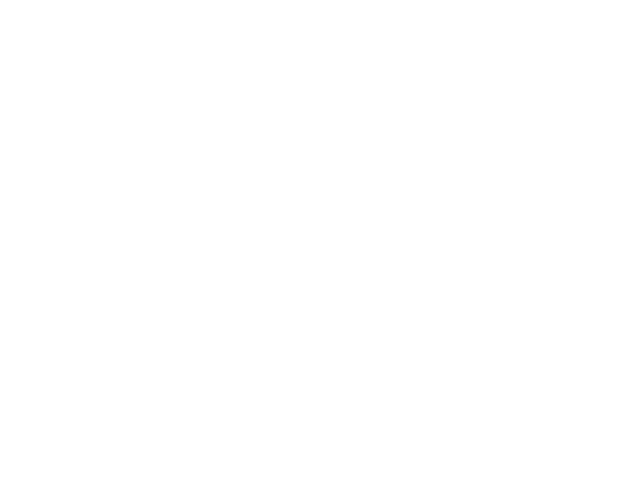

In [157]:
# initialize plot

%matplotlib notebook
fig4 = plt.figure()

In [158]:
ax = fig4.add_subplot(111)
surf = ax.pcolor(circle_mesh_x, circle_mesh_y,output_mesh4[0].reshape(grid,grid))#, N, edgecolors='none')
cbar = fig.colorbar(surf, ticks=[-1, 0, 1])

# True Output

<IPython.core.display.Javascript object>


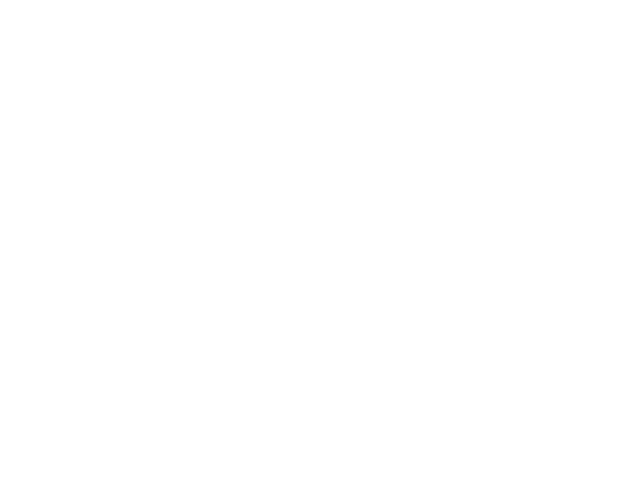

In [5]:
# initialize plot

%matplotlib notebook
fig = plt.figure()

In [6]:
# run plot
Z = np.zeros((grid,grid))
for i in range(grid):
    for j in range(grid):
        Z[i,j] = foo(circle_mesh_x[i,j],circle_mesh_y[i,j])

colors = Z/Z.max() # for colors



plt.pcolor(circle_mesh_x, circle_mesh_y, colors, edgecolors='none')
plt.show()

NameError: name 'grid' is not defined

<IPython.core.display.Javascript object>


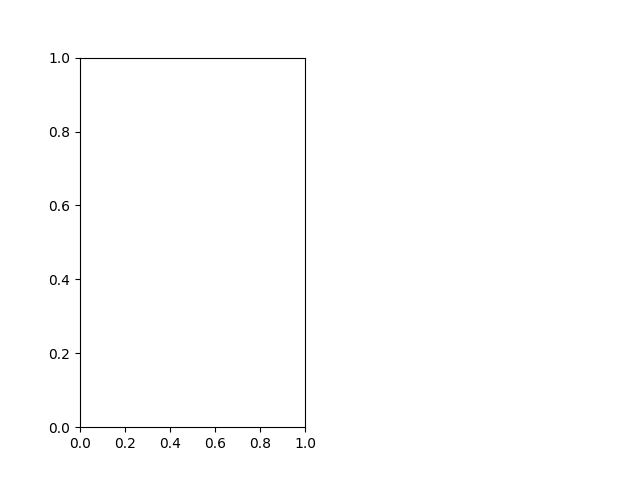

In [3]:
# initialize plot

%matplotlib notebook
fig4 = plt.figure()

In [4]:
ax = fig4.add_subplot(121)
surf = ax.pcolor(circle_mesh_x, circle_mesh_y,output_mesh4[0].reshape(grid,grid))#, N, edgecolors='none')
cbar = fig.colorbar(surf, ticks=[-1, 0, 1])

# run plot
Z = np.zeros((grid,grid))
for i in range(grid):
    for j in range(grid):
        Z[i,j] = foo(circle_mesh_x[i,j],circle_mesh_y[i,j])

colors = Z # for colors


ax2 = fig4.add_subplot(122)
ax2.pcolor(circle_mesh_x, circle_mesh_y, colors, edgecolors='none')


NameError: name 'circle_mesh_x' is not defined